In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
base = pd.read_csv("AirPassengers.csv")
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
print(base.dtypes)

Month          object
#Passengers     int64
dtype: object


In [4]:
dateparse = lambda dates: datetime.strptime(dates, "%Y-%m")
base = pd.read_csv("AirPassengers.csv", parse_dates= ["Month"],
                   index_col= "Month", date_parser= dateparse)

base

C:\Users\steph\AppData\Local\Temp\ipykernel_155500\3289059797.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  base = pd.read_csv("AirPassengers.csv", parse_dates= ["Month"],


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
ts = base["#Passengers"]
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [8]:
ts[2]

C:\Users\steph\AppData\Local\Temp\ipykernel_155500\3753609656.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ts[2]


np.int64(132)

In [11]:
ts["1949-01-01"]

np.int64(112)

In [12]:
ts["1960-08-01":"1960-12-01"]

Month
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

In [13]:
ts["1950"]

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [14]:
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [15]:
ts.index.min()

Timestamp('1949-01-01 00:00:00')

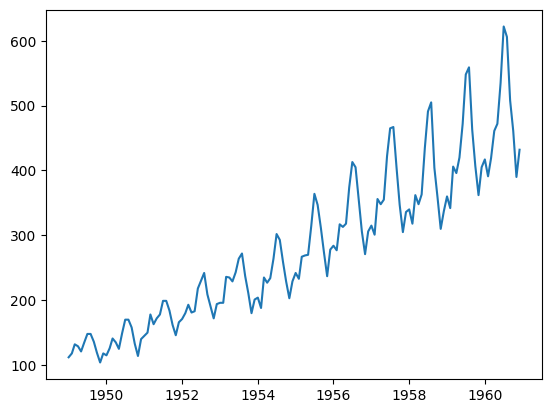

In [16]:
plt.plot(ts)

C:\Users\steph\AppData\Local\Temp\ipykernel_155500\1168954824.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  ts_ano = ts.resample("A").sum()


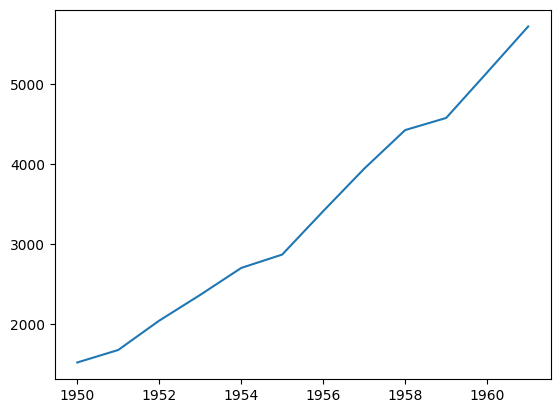

In [17]:
ts_ano = ts.resample("A").sum()
plt.plot(ts_ano)

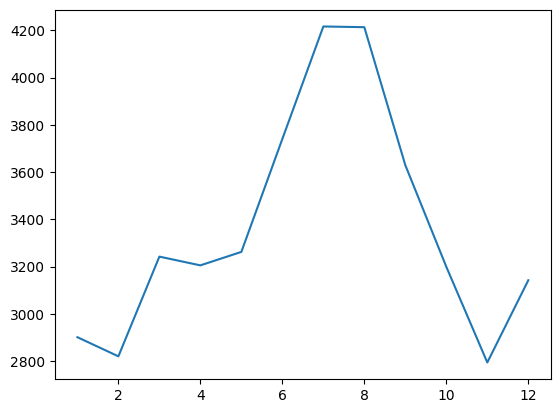

In [18]:
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

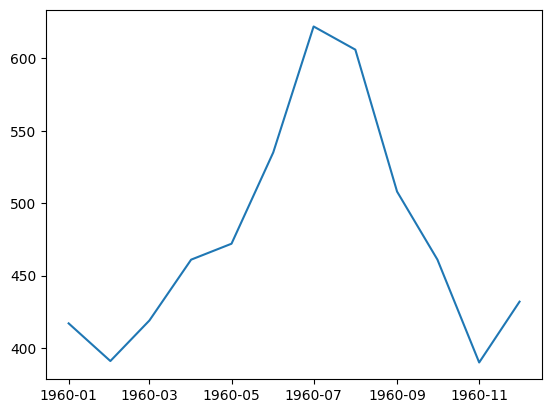

In [19]:
ts_datas = ts["1960-01-01":"1960-12-02"]
plt.plot(ts_datas)